In [6]:
!pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121

^C


Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
     ---------------------                    1.3/2.4 GB 1.1 MB/s eta 0:17:39
Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
     ---------------------------------------  2.4/2.4 GB 927.4 kB/s eta 0:01:00
Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
     ------------------                       1.1/2.4 GB 1.1 MB/s eta 0:19:37


ERROR: Exception:
Traceback (most recent call last):
  File "D:\Software\Source\GitHub\jackhhao\personal\spectra\backend\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "D:\Software\Source\GitHub\jackhhao\personal\spectra\backend\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "D:\Software\Source\GitHub\jackhhao\personal\spectra\backend\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "D:\Software\Source\GitHub\jackhhao\personal\spectra\backend\venv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^

In [24]:
!pip install ipywidgets scipy matplotlib

     ---------------------------------------- 7.6/7.6 MB 11.6 MB/s eta 0:00:00
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.1/2.1 MB 11.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="../data/walk_roll_map_2023-11-18.csv", split="train")

In [2]:
import numpy as np

hazards = list(np.unique(dataset['feature_subtype']))

In [3]:
import requests
from PIL import Image
# import torch
import json

# from transformers import Owlv2Processor, Owlv2ForObjectDetection, OwlViTProcessor, OwlViTForObjectDetection

200 OK


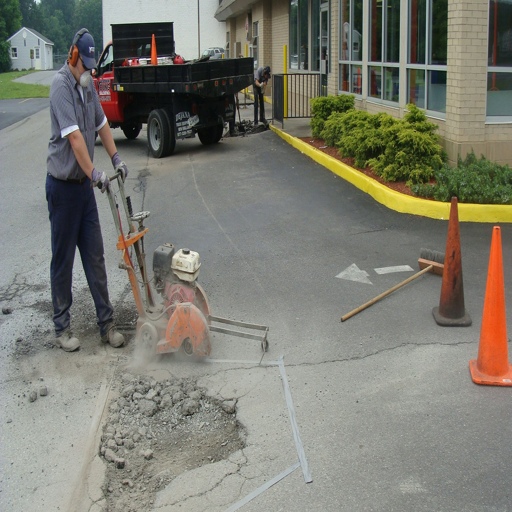

In [4]:
# url = "https://www.morrisbart.com/wp-content/uploads/2022/05/pothole-in-road-with-cone.jpg"
# url = "https://www.researchgate.net/publication/346483814/figure/fig1/AS:963465426530305@1606719466022/Examples-of-road-patches-with-obstacles.jpg"
url = "https://img.forconstructionpros.com/files/base/acbm/fcp/image/2017/02/DSC00913.58a47e4f4735c.png?auto=format%2Ccompress&q=70"
img_resp = requests.get(url, stream=True, headers=json.loads('{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}')).raw
print(img_resp.status, img_resp.reason)
image = Image.open(img_resp).resize((512, 512))
# texts = [["cat", "dog", "pothole", "traffic cone", ""]]
# texts = [["stop_sign","person","bicycle","bus","truck","car","motorbike","reflective_cone","ashcan","warning_column","spherical_roadblock","pole","dog","tricycle","fire_hydrant"]]
texts = [hazards]

image

# from torchvision.transforms import v2
# transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
# images = image
# images = transform(image).to("cuda")


In [6]:
processor = Owlv2Processor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")#.to("cuda")

In [35]:
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

In [7]:
inputs = processor(text=texts, images=image, return_tensors="pt")
print(type(inputs))
# inputs = {k: v.to("cuda") for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
    # Target image sizes (height, width) to rescale box predictions [batch_size, 2]
    target_sizes = torch.tensor([image.size[::-1]])
    
    # Convert outputs (bounding boxes and class logits) to COCO API
    results = processor.post_process_object_detection(outputs, threshold=0.2, target_sizes=target_sizes)[0]

# target_sizes = torch.Tensor([image.size[::-1]])
# results = processor.post_process_object_detection(outputs=outputs, threshold=0.1, target_sizes=target_sizes)

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [46]:
results

{'scores': tensor([0.1401, 0.2304, 0.1501, 0.1005, 0.1601, 0.1070, 0.1326, 0.1342, 0.1263,
         0.1610, 0.1417, 0.1198, 0.1067, 0.1303, 0.1035, 0.1586, 0.2119, 0.1482,
         0.1328, 0.2801, 0.1054, 0.2737, 0.1524, 0.1294, 0.2414, 0.1619, 0.1224,
         0.2109, 0.1490, 0.1666, 0.1839, 0.1596, 0.1812, 0.1177, 0.1892, 0.1490,
         0.2476, 0.4046, 0.1078, 0.1908, 0.1024, 0.1023, 0.1077, 0.1302, 0.1042,
         0.1559, 0.1419, 0.1315, 0.2804, 0.1959, 0.2626, 0.1141, 0.1761, 0.1598,
         0.2290, 0.3866, 0.1553, 0.1104, 0.1251, 0.1247, 0.1094, 0.1245, 0.2491,
         0.1427, 0.1148, 0.1570, 0.1404, 0.1635, 0.2648, 0.1288, 0.1097]),
 'labels': tensor([16, 16, 12, 26, 28, 15, 26, 28, 26, 15, 16, 28, 28, 16, 16, 16, 28, 25,
         26, 35, 26, 15, 35, 39, 39, 10,  8, 35, 26, 39, 39, 39, 18, 35,  8, 35,
         18,  8,  8, 24, 35,  8, 16, 25, 16, 28, 35, 10,  3,  3,  3,  8, 18, 10,
         35, 10, 13, 35, 18, 18, 35, 35,  8, 18, 18, 17, 18, 18, 18, 17,  8]),
 'boxes': tensor

In [108]:
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
# boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
boxes, scores, labels = results["boxes"], results["scores"], results["labels"]

# Print detected objects and rescaled box coordinates
for box, score, label in sorted(zip(boxes, scores, labels), key=lambda x: x[1], reverse=True):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")


Detected missing curb cut with confidence 0.405 at location [267.57, 126.66, 509.85, 223.37]
Detected obstruction - bollard with confidence 0.387 at location [429.06, 194.63, 472.4, 327.98]
Detected crosswalk markings no longer visible with confidence 0.28 at location [335.39, 262.19, 413.3, 285.17]
Detected slope issues (eg. driveways) with confidence 0.28 at location [11.61, 69.38, 59.02, 85.4]
Detected obstruction - parked vehicles or delivery vans with confidence 0.274 at location [90.55, 22.27, 256.59, 158.09]
Detected obstruction - uneven sidewalk (eg. roots, holes, cracks) with confidence 0.265 at location [97.3, 375.64, 248.48, 509.91]
Detected crosswalk markings no longer visible with confidence 0.263 at location [334.87, 263.13, 373.25, 284.92]
Detected missing curb cut with confidence 0.249 at location [58.27, 374.75, 114.72, 510.0]
Detected obstruction - uneven sidewalk (eg. roots, holes, cracks) with confidence 0.248 at location [297.81, 138.79, 440.38, 199.1]
Detected veh

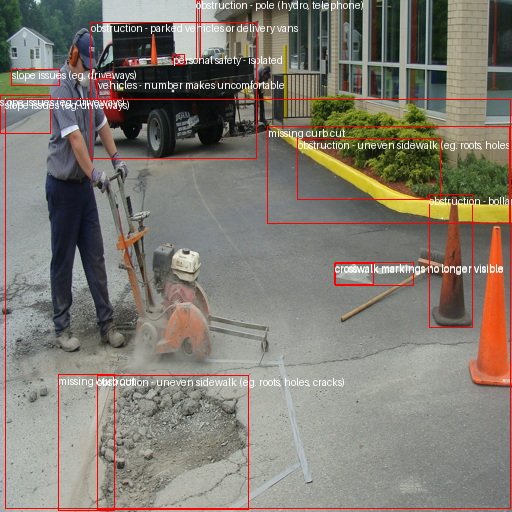

In [109]:
from PIL import ImageDraw

visualized_image = image.copy()

draw = ImageDraw.Draw(visualized_image)

for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    x1, y1, x2, y2 = tuple(box)
    draw.rectangle(xy=((x1, y1), (x2, y2)), outline="red")
    draw.text(xy=(x1, y1), text=text[label])

visualized_image

In [50]:
# export
pt_save_directory = "./model"
processor.save_pretrained(pt_save_directory)
model.save_pretrained(pt_save_directory)

In [104]:
print(len(tuple(inputs.values())))

print(tuple([{**inputs}]))
# print(inputs.keys())
# print(tuple(**inputs))

3
({'input_ids': tensor([[49406, 10397,   593,  8361,  4976,  1823, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [49406, 10397,   593,  8361,  4976,  1155, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [49406, 10397,   593,  8361,  4976, 15391,   917,   736, 49407,     0,
             0,     0,     0,     0,     0,     0],
        [49406,  5266,  2374, 41046,   871,  5349,  8626, 49407,     0,     0,
             0,     0,     0,     0,     0,     0],
        [49406,  5266,  2374,  4049, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [49406,  7384,   847,   713,  1691,   541, 16825,   531, 33895, 49407,
             0,     0,     0,     0,     0,     0],
        [49406,   733, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [49406,  5579, 49407,     0,     0,     0,     0,     0,  

In [9]:
# return {
#     "input_ids": {0: "text_batch_size", 1: "sequence_length"},
#     "pixel_values": {0: "image_batch_size", 1: "num_channels", 2: "height", 3: "width"},
#     "attention_mask": {0: "text_batch_size", 1: "sequence_length"},
# }
# from optimum.exporters.onnx.model_configs import OwlViTOnnxConfig
# inputs = inputs.convert_to_tensors('pt')

torch.onnx.export(
    model,
    tuple([{**inputs}]),
    f="owlv2.onnx",
    input_names=['input_ids', 'attention_mask', 'pixel_values'],
    output_names=['logits', 'pred_boxes', 'text_embeds', 'image_embeds'],
    #config.inputs.keys(),
    # output_names=config.outputs.keys(), 
    dynamic_axes={'input_ids': {0: 'batch_size', 1: 'sequence'},
                  "attention_mask": {0: "text_batch_size", 1: "sequence_length"},
                  "pixel_values": {0: "image_batch_size", 1: "num_channels"},
                  'logits': {0: "image_batch_size", 2: "num_queries"},
                  "pred_boxes": {0: "image_batch_size", 1: "num_boxes"},
                  "text_embeds": {0: "text_batch_size", 1: "max_text_queries"},
                  "image_embeds": {0: "image_batch_size"}
    },
    do_constant_folding=True, 
    opset_version=13, 
)
# export_options = 
# out = torch.onnx.dynamo_export(model, tuple(inputs.values()))
# out.save("owlv2.onnx")


c:\Users\jackh\Code\personal\spectra\backend\venv\Lib\site-packages\torch\onnx\symbolic_opset9.py:5859: UserWarning: Exporting aten::index operator of advanced indexing in opset 13 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.
  warnings.warn(


In [11]:
from transformers import AutoImageProcessor, pipeline
from optimum.onnxruntime import ORTModelForCustomTasks

processor = AutoImageProcessor.from_pretrained("owlv2.onnx")
model = ORTModelForCustomTasks.from_pretrained("owlv2.onnx")
onnx_extractor = pipeline("zero-shot-object-detection", model=model, image_processor=processor)

preds = onnx_extractor(image, texts)

preds

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 19: invalid start byte

: 

In [ ]:
import onnxruntime as ort
import numpy as np
ort_sess = ort.InferenceSession('owlv2.onnx')
outputs = ort_sess.run(None, {'input': })
# Print Result
result = outputs[0].argmax(axis=1)+1
print("This is a %s news" %ag_news_label[result[0]])

In [110]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, CLIPSegModel

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
# model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")

In [111]:
prompts = texts[0]

# inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
inputs = processor(text=prompts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():
  outputs = model(**inputs)
  
outputs

CLIPSegOutput(loss=None, logits_per_image=tensor([[18.7602, 18.5245, 20.9081, 23.3469, 23.6759, 21.6297, 20.0327, 11.9375,
         27.4408, 20.7233, 23.5805, 23.0548, 20.4688, 24.1597, 23.0172, 23.0610,
         21.3010, 24.5458, 27.7845, 22.4464, 19.0730, 19.1349, 18.6288, 22.4650,
         19.9275, 19.8285, 22.2897, 20.7371, 20.5251, 21.5423, 22.0505, 19.2850,
         15.9616, 20.1617, 18.8947, 25.8068, 15.5852, 18.1665, 22.8460, 18.6411,
         20.4034]]), logits_per_text=tensor([[18.7602],
        [18.5245],
        [20.9081],
        [23.3469],
        [23.6759],
        [21.6297],
        [20.0327],
        [11.9375],
        [27.4408],
        [20.7233],
        [23.5805],
        [23.0548],
        [20.4688],
        [24.1597],
        [23.0172],
        [23.0610],
        [21.3010],
        [24.5458],
        [27.7845],
        [22.4464],
        [19.0730],
        [19.1349],
        [18.6288],
        [22.4650],
        [19.9275],
        [19.8285],
        [22.2897],
   

In [112]:
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)[0] # single image  # we can take the softmax to get the label probabilities

for i, prompt in enumerate(prompts):
  print(f"Prompt: {prompt}")
  print(f"Label probs: {probs[i].tolist()}")
  print()

Prompt: conflict with vehicles turning left
Label probs: 5.962257273495197e-05

Prompt: conflict with vehicles turning right
Label probs: 4.7102315875235945e-05

Prompt: conflict with vehicles turning righton red
Label probs: 0.0005107647157274187

Prompt: crosswalk markings no longer visible
Label probs: 0.005852711386978626

Prompt: crosswalk needed
Label probs: 0.008133421652019024

Prompt: drivers don't stop or yield to pedestrians
Label probs: 0.0010510198771953583

Prompt: ice
Label probs: 0.0002128339692717418

Prompt: leaves
Label probs: 6.491220005955256e-08

Prompt: missing curb cut
Label probs: 0.35103294253349304

Prompt: obstruction - bike rack (including bikeshare)
Label probs: 0.0004245645541232079

Prompt: obstruction - bollard
Label probs: 0.007393004838377237

Prompt: obstruction - bus shelter
Label probs: 0.00437054643407464

Prompt: obstruction - garbage or recycling bins
Label probs: 0.00032916368218138814

Prompt: obstruction - inadequate or lack of safe detour fo

In [113]:
import matplotlib.pyplot as plt

preds = outputs.logits.unsqueeze(1)

# visualize prediction
# _, ax = plt.subplots(1, 5, figsize=(15, 4))
# [a.axis('off') for a in ax.flatten()]
# ax[0].imshow(image)
# [ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
# [ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

AttributeError: 'CLIPSegOutput' object has no attribute 'logits'

In [40]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

predictions = detector(
    image,
    candidate_labels=prompts,
)

predictions

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.8681625723838806,
  'label': 'a photo of a traffic cone',
  'box': {'xmin': 91, 'ymin': 27, 'xmax': 155, 'ymax': 162}}]

In [43]:
from transformers import AutoImageProcessor, DeformableDetrForObjectDetection, DeformableDetrImageProcessor

processor = DeformableDetrImageProcessor.from_pretrained("facebook/deformable-detr-detic")
model = DeformableDetrForObjectDetection.from_pretrained("facebook/deformable-detr-detic")

with torch.no_grad():
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.7
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected cone with confidence 0.849 at location [97.49, 28.33, 156.15, 163.06]


In [5]:
from mmdet.apis import init_detector, inference_detector

config_file = 'mmcv/rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'mmcv/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'
inference_detector(model, image)

ImportError: DLL load failed while importing _ext: The specified procedure could not be found.